<a href="https://colab.research.google.com/github/AMEYABHAVE/Cristl/blob/main/Time_series_functions_for_accelerometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False 

In [ ]:
df = pd.read_csv('https://zenodo.org/record/4642560/files/CHARM_v1.1_accelerometer.csv?download=1')

In [ ]:
df

name  ...                                  uuid
0       accelerometer  ...  33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
1       accelerometer  ...  33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
2       accelerometer  ...  33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
3       accelerometer  ...  33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
4       accelerometer  ...  33302ecf-c5e5-4c5e-aea9-8d0457cd8b51
...               ...  ...                                   ...
296904  accelerometer  ...  9f6b4653-f4af-4c04-9b4e-3de934ff9345
296905  accelerometer  ...  9f6b4653-f4af-4c04-9b4e-3de934ff9345
296906  accelerometer  ...  9f6b4653-f4af-4c04-9b4e-3de934ff9345
296907  accelerometer  ...  9f6b4653-f4af-4c04-9b4e-3de934ff9345
296908  accelerometer  ...  9f6b4653-f4af-4c04-9b4e-3de934ff9345

[296909 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296909 entries, 0 to 296908
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   name        296909 non-null  object 
 1   time        296909 non-null  int64  
 2   acc_x       296909 non-null  float64
 3   acc_y       296909 non-null  float64
 4   acc_z       296909 non-null  float64
 5   activity    296909 non-null  object 
 6   repetition  296909 non-null  int64  
 7   uuid        296909 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 18.1+ MB


In [ ]:
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)

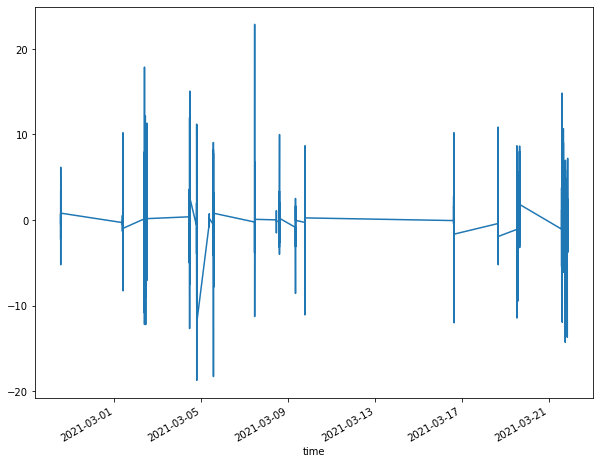

In [ ]:
df.set_index('time')['acc_x'].plot()

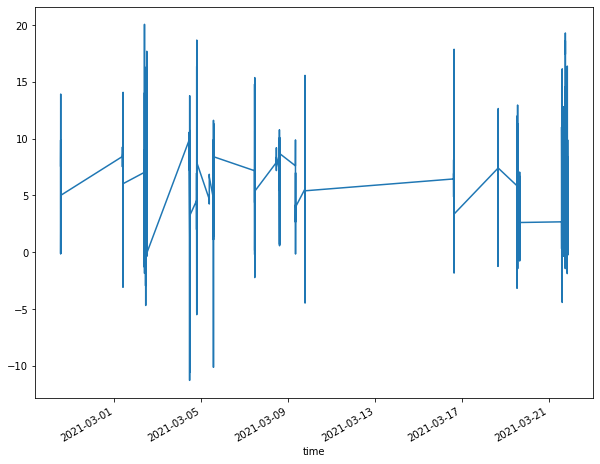

In [ ]:
df.set_index('time')['acc_y'].plot()

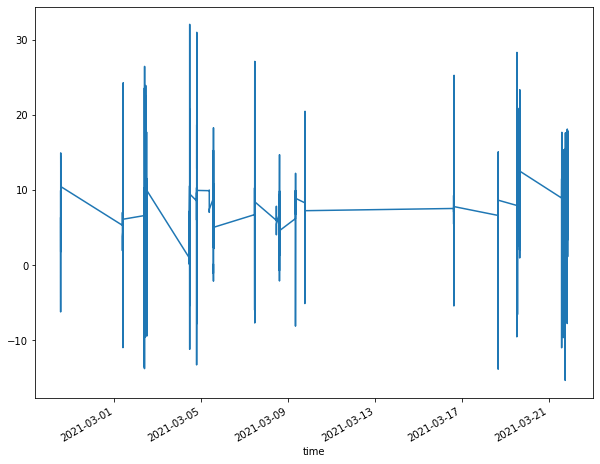

In [ ]:
df.set_index('time')['acc_z'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f9f576410>,
      dtype=object)

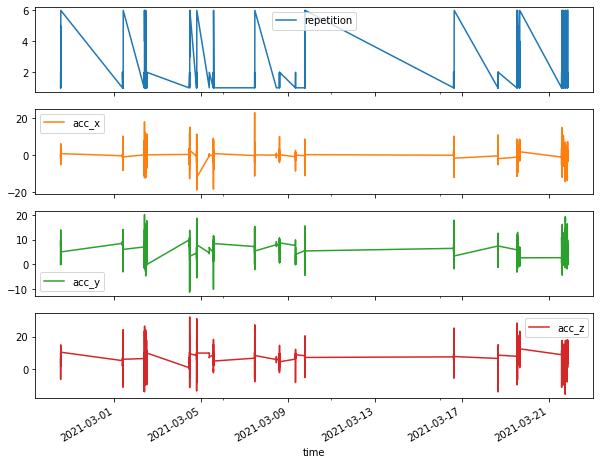

In [ ]:
df.set_index('time')[['repetition','acc_x','acc_y','acc_z',]].plot(subplots=True)

In [ ]:
df.count()

name          296909
time          296909
acc_x         296909
acc_y         296909
acc_z         296909
activity      296909
repetition    296909
uuid          296909
dtype: int64

In [18]:
features=df[['activity','acc_x','acc_y','acc_z']].to_numpy().tolist()
target=df['activity'].tolist()

In [19]:
features[0:11]

[['CHAIR', -0.414825439453125, 7.590469360351562, 6.2353363037109375],
 ['CHAIR', -0.3376617431640625, 7.6455078125, 6.125274658203125],
 ['CHAIR', -0.3932952880859375, 7.6054229736328125, 6.2311553955078125],
 ['CHAIR', -0.469268798828125, 7.592864990234375, 6.281402587890625],
 ['CHAIR', -0.4184112548828125, 7.6335296630859375, 6.317306518554688],
 ['CHAIR', -0.427398681640625, 7.616790771484375, 6.25628662109375],
 ['CHAIR', -0.4154205322265625, 7.640716552734375, 6.182708740234375],
 ['CHAIR', -0.436370849609375, 7.57012939453125, 6.386688232421875],
 ['CHAIR', -0.3454437255859375, 7.617385864257812, 6.167160034179688],
 ['CHAIR', -0.4124298095703125, 7.665252685546875, 5.9362335205078125],
 ['CHAIR', -0.484222412109375, 7.5856781005859375, 6.1593780517578125]]

In [20]:
target[0:11]

['CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR',
 'CHAIR']

In [21]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)

In [22]:
ts_generator[0]

(array([[['CHAIR', '-0.414825439453125', '7.590469360351562',
          '6.2353363037109375'],
         ['CHAIR', '-0.3376617431640625', '7.6455078125',
          '6.125274658203125'],
         ['CHAIR', '-0.3932952880859375', '7.6054229736328125',
          '6.2311553955078125'],
         ['CHAIR', '-0.469268798828125', '7.592864990234375',
          '6.281402587890625'],
         ['CHAIR', '-0.4184112548828125', '7.6335296630859375',
          '6.317306518554688'],
         ['CHAIR', '-0.427398681640625', '7.616790771484375',
          '6.25628662109375']]], dtype='<U19'), array(['CHAIR'], dtype='<U5'))

In [23]:
ts_generator[0][0][0].shape

(6, 4)

In [24]:
ts_generator[1]

(array([[['CHAIR', '-0.3376617431640625', '7.6455078125',
          '6.125274658203125'],
         ['CHAIR', '-0.3932952880859375', '7.6054229736328125',
          '6.2311553955078125'],
         ['CHAIR', '-0.469268798828125', '7.592864990234375',
          '6.281402587890625'],
         ['CHAIR', '-0.4184112548828125', '7.6335296630859375',
          '6.317306518554688'],
         ['CHAIR', '-0.427398681640625', '7.616790771484375',
          '6.25628662109375'],
         ['CHAIR', '-0.4154205322265625', '7.640716552734375',
          '6.182708740234375']]], dtype='<U19'), array(['CHAIR'], dtype='<U5'))

In [25]:
ts_generator[2]

(array([[['CHAIR', '-0.3932952880859375', '7.6054229736328125',
          '6.2311553955078125'],
         ['CHAIR', '-0.469268798828125', '7.592864990234375',
          '6.281402587890625'],
         ['CHAIR', '-0.4184112548828125', '7.6335296630859375',
          '6.317306518554688'],
         ['CHAIR', '-0.427398681640625', '7.616790771484375',
          '6.25628662109375'],
         ['CHAIR', '-0.4154205322265625', '7.640716552734375',
          '6.182708740234375'],
         ['CHAIR', '-0.436370849609375', '7.57012939453125',
          '6.386688232421875']]], dtype='<U19'), array(['CHAIR'], dtype='<U5'))

In [26]:
len(ts_generator)

296903

In [27]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=2)

In [28]:
len(ts_generator)

148452

In [29]:
ts_generator[0]

(array([[['CHAIR', '-0.414825439453125', '7.590469360351562',
          '6.2353363037109375'],
         ['CHAIR', '-0.3376617431640625', '7.6455078125',
          '6.125274658203125'],
         ['CHAIR', '-0.3932952880859375', '7.6054229736328125',
          '6.2311553955078125'],
         ['CHAIR', '-0.469268798828125', '7.592864990234375',
          '6.281402587890625'],
         ['CHAIR', '-0.4184112548828125', '7.6335296630859375',
          '6.317306518554688'],
         ['CHAIR', '-0.427398681640625', '7.616790771484375',
          '6.25628662109375']],
 
        [['CHAIR', '-0.3376617431640625', '7.6455078125',
          '6.125274658203125'],
         ['CHAIR', '-0.3932952880859375', '7.6054229736328125',
          '6.2311553955078125'],
         ['CHAIR', '-0.469268798828125', '7.592864990234375',
          '6.281402587890625'],
         ['CHAIR', '-0.4184112548828125', '7.6335296630859375',
          '6.317306518554688'],
         ['CHAIR', '-0.427398681640625', '7.61679077148

In [30]:
ts_generator[1]

(array([[['CHAIR', '-0.3932952880859375', '7.6054229736328125',
          '6.2311553955078125'],
         ['CHAIR', '-0.469268798828125', '7.592864990234375',
          '6.281402587890625'],
         ['CHAIR', '-0.4184112548828125', '7.6335296630859375',
          '6.317306518554688'],
         ['CHAIR', '-0.427398681640625', '7.616790771484375',
          '6.25628662109375'],
         ['CHAIR', '-0.4154205322265625', '7.640716552734375',
          '6.182708740234375'],
         ['CHAIR', '-0.436370849609375', '7.57012939453125',
          '6.386688232421875']],
 
        [['CHAIR', '-0.469268798828125', '7.592864990234375',
          '6.281402587890625'],
         ['CHAIR', '-0.4184112548828125', '7.6335296630859375',
          '6.317306518554688'],
         ['CHAIR', '-0.427398681640625', '7.616790771484375',
          '6.25628662109375'],
         ['CHAIR', '-0.4154205322265625', '7.640716552734375',
          '6.182708740234375'],
         ['CHAIR', '-0.436370849609375', '7.5701293

In [31]:
pd.concat([df['activity'],df['activity'].shift(-1), df['activity'].shift(-2)],axis=1)

activity    activity    activity
0            CHAIR       CHAIR       CHAIR
1            CHAIR       CHAIR       CHAIR
2            CHAIR       CHAIR       CHAIR
3            CHAIR       CHAIR       CHAIR
4            CHAIR       CHAIR       CHAIR
...            ...         ...         ...
296904  DOWNSTAIRS  DOWNSTAIRS  DOWNSTAIRS
296905  DOWNSTAIRS  DOWNSTAIRS  DOWNSTAIRS
296906  DOWNSTAIRS  DOWNSTAIRS  DOWNSTAIRS
296907  DOWNSTAIRS  DOWNSTAIRS         NaN
296908  DOWNSTAIRS         NaN         NaN

[296909 rows x 3 columns]

In [34]:
multi_target=pd.concat([df['activity'].shift(-1), df['activity'].shift(-2)],axis=1).dropna().to_numpy().tolist()

In [35]:
multi_target[0:13]

[['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR'],
 ['CHAIR', 'CHAIR']]

In [36]:
ts_generator = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

In [37]:
ts_generator[0]

(array([[['CHAIR', '-0.414825439453125', '7.590469360351562',
          '6.2353363037109375'],
         ['CHAIR', '-0.3376617431640625', '7.6455078125',
          '6.125274658203125'],
         ['CHAIR', '-0.3932952880859375', '7.6054229736328125',
          '6.2311553955078125'],
         ['CHAIR', '-0.469268798828125', '7.592864990234375',
          '6.281402587890625'],
         ['CHAIR', '-0.4184112548828125', '7.6335296630859375',
          '6.317306518554688'],
         ['CHAIR', '-0.427398681640625', '7.616790771484375',
          '6.25628662109375']]], dtype='<U19'),
 array([['CHAIR', 'CHAIR']], dtype='<U5'))

In [38]:
ts_generator[1]

(array([[['CHAIR', '-0.4154205322265625', '7.640716552734375',
          '6.182708740234375'],
         ['CHAIR', '-0.436370849609375', '7.57012939453125',
          '6.386688232421875'],
         ['CHAIR', '-0.3454437255859375', '7.617385864257812',
          '6.167160034179688'],
         ['CHAIR', '-0.4124298095703125', '7.665252685546875',
          '5.9362335205078125'],
         ['CHAIR', '-0.484222412109375', '7.5856781005859375',
          '6.1593780517578125'],
         ['CHAIR', '-0.4220123291015625', '7.61260986328125',
          '6.3155059814453125']]], dtype='<U19'),
 array([['CHAIR', 'CHAIR']], dtype='<U5'))